In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-11-22 08:12:34--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-11-22 08:12:34 (43.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [16]:
# Load in the data
data = pd.read_csv('moore.csv', header=None)
data.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [18]:
# pd to numpy
data = pd.read_csv('moore.csv', header=None).values

In [19]:
X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:,1]

In [20]:
print(str(X[0]) + str(Y[0]))

[1971]2300


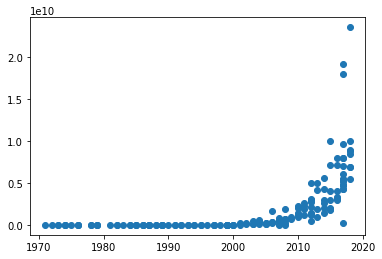

In [21]:
# Plot the data - it is exponential!
plt.scatter(X, Y)

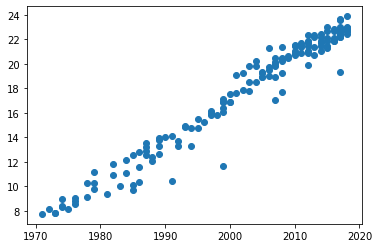

In [22]:
# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X, Y)

In [24]:
# Let's also center the X data so the values are not too large
# We could scale it too but then we'd have to reverse the transformation later
X = X - X.mean()

In [28]:
# Now create our Tensorflow model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(1,)))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
model.summary()
# model.compile(optimizer='adam', loss='mse')


# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001
 

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(X, Y, epochs=200, callbacks=[scheduler])

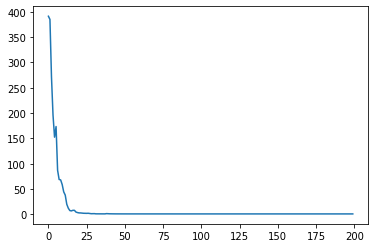

In [30]:
# Plot the loss
plt.plot(history.history['loss'], label='loss')

In [32]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers[0].get_weights())

[array([[0.3372047]], dtype=float32), array([17.773249], dtype=float32)]


In [33]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]
print(a)

0.3372047


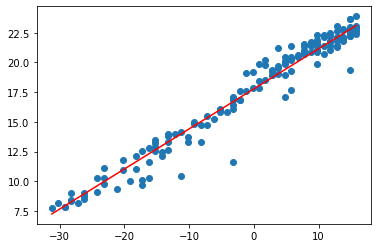

In [40]:
# Make sure the line fits our data
Y_predict = model.predict(X).flatten()
plt.scatter(X, Y)            # original
plt.plot(X, Y_predict, 'r')  # prediction with a regression line